In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
from scipy.optimize import fsolve
# import warnings
# warnings.filterwarnings("error")
import pyvista as pv

In [26]:
T = 3

a = 0
b = 1

h = 0.01
tau = 0.01

M = int(T/tau) + 1
N = int((b-a)/h) + 1

# taus = np.random.uniform(low=0.001, high=0.1, size=(M))
# taus = taus / taus.sum() * T
taus = np.ones(M) * tau
U = np.zeros((M, N))
Q = np.zeros(N)
# Psi = np.ones(N-1)
# Psi = np.random.uniform(low=0.001, high=5, size=(N-1))#np.random.rand(N-1)
# Psi = Psi / Psi.sum() * (b-a)/h
Psi = np.ones(N-1)
Psis = [Psi.copy()]

Kuxt = lambda u, x, t: u**2
K = lambda m, n: Kuxt(U[m][n], n*h, m*tau)

for n in range(N):
    U[0][n] = 0#1 - n*h
    # U[0][n] = -40*((n*h)-0.5)**2+10
    # U[0][n] = 10*np.sin(10*n*h)

for m in range(1, M):
    Psi_next = Psi
    tau = taus[m]
    def Equations(U_m):
        Equations_returned = np.zeros(N)
        Equations_returned[0] = U_m[0] - 1
        Equations_returned[N-1] = U_m[N-1]
        for n in range(1, N-1):
            Equations_returned[n] = (tau/(2*h**2)*(K(m-1, n+1) + K(m-1, n))/Psi[n]) * U_m[n+1] -\
                                    ((Psi_next[n] + Psi_next[n-1])/2 +\
                                        tau/(2*h**2)*((K(m-1,n+1) + K(m-1, n))/Psi[n]+(K(m-1,n) + K(m-1, n-1))/Psi[n-1]))*U_m[n] +\
                                    (tau/(2*h**2)*(K(m-1, n) + K(m-1, n-1))/Psi[n-1]) * U_m[n-1] -\
                                    tau/h*(Q[n+1]*U[m-1][n+1] - Q[n]*U[m-1][n]) +\
                                    (Psi[n]+Psi[n-1])/2*U[m-1][n]
        return Equations_returned
                    
    U[m] = fsolve(Equations, U[m-1])
    
    Psis.append(Psi.copy())

c:\Users\rouol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


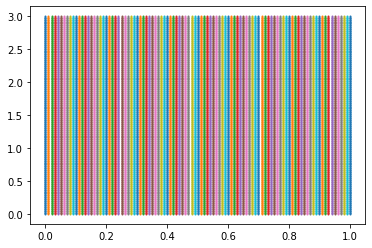

In [27]:
t = 0
graph = []
for i, Psi in enumerate(Psis):
    if i % 1 == 0:
        X = list()
        xi = 0
        X.append(xi)
        for psi in Psi:
            xi += psi * h
            X.append(xi)
        graph.append([X, list(np.full((len(X)), t))])
        # plt.scatter(X, np.full((len(X)), t), s=1, color='black')
        t += taus[i]
graph = np.array(graph)
graph = graph.transpose()
# graph.shape, graph[0]
for l in graph:
    # l = line.transpose()
    plt.scatter(l[0], l[1], s=1)
plt.show()

In [28]:
def make_point_set():
    t = 0
    points = np.zeros((M*N, 3))
    for i, Psi in enumerate(Psis):
        points[i*N:(i+1)*N, 2] = U[i, :]
        if i % 1 == 0:
            X = np.zeros((N))
            for j, psi in enumerate(Psi, 1):
                X[j] = X[j-1] + psi * h
            points[i*N:(i+1)*N, 0] = X
            points[i*N:(i+1)*N, 1] = np.full((N), t)
            # points[i*N:(i+1)*N, :2] = np.array([X, np.full((N), t)]).transpose()
            # plt.scatter(X, np.full((len(X)), t), s=1, color='black')
            t += tau
    foo = pv.PolyData(points)
    foo.rotate_z(0, inplace=True)
    return foo.points
# def make_point_set_example():
#     """Ignore the contents of this function. Just know that it returns an
#     n by 3 numpy array of structured coordinates."""
#     n, m = 29, 32
#     x = np.linspace(-200, 200, num=n) + np.random.uniform(-5, 5, size=n)
#     y = np.linspace(-200, 200, num=m) + np.random.uniform(-5, 5, size=m)
#     xx, yy = np.meshgrid(x, y)
#     A, b = 100, 100
#     zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))
#     points = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]
#     foo = pv.PolyData(points)
#     foo.rotate_z(36.6, inplace=True)
#     return foo.points


# poly_data = pv.PolyData(points)
mesh = pv.StructuredGrid()
# Set the coordinates from the numpy array
mesh.points = make_point_set()
# set the dimensions
mesh.dimensions = [N, M, 1]
# mesh.plot()
mesh.plot(show_edges=True, show_grid=True)
# mesh.plot(show_edges=True, show_grid=True, cpos="xy")

# plt.figure(figsize=(10, 10))
# plt.scatter(points[:, 0], points[:, 1], c=points[:, 2], s=1)
# plt.axis("image")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)